<a href="https://colab.research.google.com/github/mori8/NLP-Pytorch-practice/blob/main/Chapter_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EA%B8%B0%EB%B3%B8_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 퍼셉트론: 가장 간단한 신경망

**퍼셉트론**은 가장 간단한 신경망으로 생물학적 뉴런을 본떠 만들었다. 생물학적 뉴런과 마찬가지로 **입력**과 **출력**이 있고, 신호는 입력에서 출력으로 흐른다.

퍼셉트론 유닛에는 입력(x)과 출력(y), 그리고 3개의 다이얼(가중치, 절편, 활성화 함수)이 있다. 활성화 함수는 신경망과 타겟 출력을 기반으로 설계자의 직관에 따라 결정된다. 이는 수학적으로 $y = f(w \times x + b)$처럼 표현된다. 일반적으로 퍼셉트론에서는 입력을 하나 이상 사용하므로, x와 w는 벡터가 되고 이들의 곱셈은 점곱(dot product)로 바뀐다. 따라서 $y = f(wx + b)$로 표현된다.

$f$로 표현된 활성화 함수는 일반적으로 비선형 함수다. 즉 선형 함수인 $wx + b$와 비선형 함수인 $f$의 조합이며, 선형 함수 표현인 $wx + b$를 **아핀 현환(affine transfirm)**이라고도 부른다.

> 아핀 변환: 선형 변환 중 하나이며, 점과 점 사이의 상대적인 거리와 평행선이 유지됨.


In [2]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  def __init__(self, input_dim):
    # input_dim (int): 입력 특성의 크기
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1)

  def forward(self, x_in):
    # x_in (torch.Tensor): 입력 데이터 텐서
    #                      x_in.shape = (batch, num_features)
    
    # 반환값: 결과 텐서. tensor.shape = (batch, )
    return torch.sigmoid(self.fc1(x_in)).squeeze()

## 3.2 활성화 함수

활성화 함수는 비선형 함수로, 신경망에서 데이터의 복잡한 관계를 감지하는 데 사용한다.

### 3.2.1 시그모이드(Sigmoid)

시그모이드는 신경망 분야의 초창기부터 사용한 활성화 함수다. 임의의 실숫값을 받아 0과 1 사이의 범위로 압축한다. 시그모이드는 미분 가능한 함수다.

$$f(x) = \cfrac{1}{1+e^{-x}}$$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


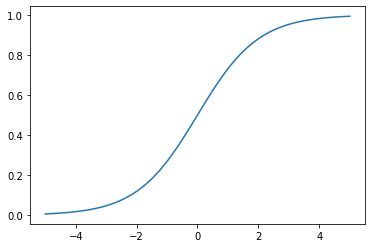

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

위의 그래프에서 볼 수 있듯이 시그모이드는 입력 범위 대부분에서 매우 빠르게 **포화**된다(극단적인 출력을 만든다). 이로 인해 그레이디언트가 0이 되거나 발산하여 부동소수 오버플로가 되는 문제가 발생한다. 이 현상을 각각 **그레이디언트 소실 문제(vanishing gradient problem)**와 **그레이디언트 폭주 문제(exploding gradient problem)**라고 부른다. 이 때문에 신경망에서 시그모이드는 거의 출력층에서 출력을 확률로 압축하는 용도로만 사용한다.

### 3.2.2 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh)

하이퍼볼릭 탄젠트 활성화 함수는 시그모이드 함수를 선형 변환한 것이다. 공식은 다음과 같다.

$$f(x) = tanh x = \cfrac{e^x - e^{-x}}{e^x + e^{-x}}$$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


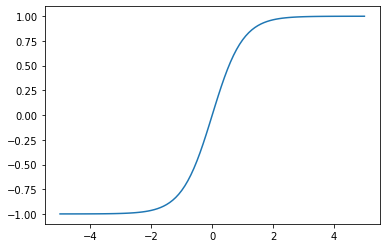

In [4]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 3.2.3 렐루(ReLU) 🌟

딥러닝의 핵심이 되는 활성화 함수다. 렐루는 음수인 입력에 대하여 0을 출력하며, 그 이상의 값은 입력값 그대로 출력한다. 렐루는 음수를 제거함으로써 그레이디언트 소실 문제를 해결한다. 하지만 시간이 지나 신경망의 특정 출력이 0이 되면 다시 돌아오지 않는다는 문제가 있으며, 이것을 `죽은 렐루` 문제라고 한다. 이런 현상을 줄이기 위해 LeakyReLU, PReLU 활성화 함수 같은 변종이 개발되었다.

$f(x) = max(0, x)$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


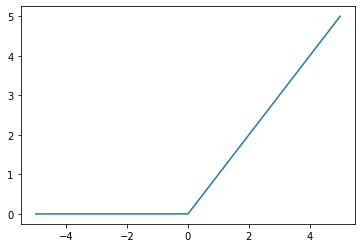

In [5]:
import torch
import matplotlib.pyplot as plt
# ReLU
relu = torch.nn.ReLU()
x = torch.range(-5., 5, 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


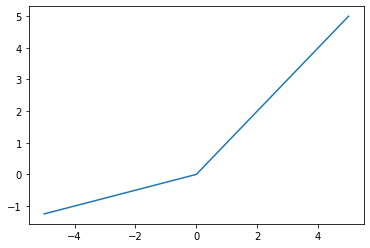

In [6]:
import torch
import matplotlib.pyplot as plt
# PReLU
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5, 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 3.2.4 소프트맥스(softmax)

소프트맥스 활성화 함수는 시그모이드처럼 신경망 유닛의 출력을 0과 1 사이로 압축한다. 소프트맥스는 모든 출력의 합으로 각 출력을 나누어 k개 클래스에 대한 **이산 확률 분포**를 만든다. 소프트맥스의 출력의 합은 1이 되며, **분류** 작업의 출력을 해석하는 데 매우 유용하다. 따라서 이 함수는 보통 확률 기반의 목적 함수인 **범주형 크로스 엔트로피**와 함께 사용한다.

$$softmax(x_i) = \cfrac{e^{x_i}}{\sum_{f=1}^{k}{e^{x_j}}}$$

In [7]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[0.6458, 0.0568, 0.1689]])
tensor([[0.4596, 0.2551, 0.2853]])
tensor([1.])


## 3.3 손실 함수

손실 함수는 정답($y$)와 예측($\hat{y}$)을 입력으로 받아 실숫값 점수를 만든다. 이 점수가 높을수록 모델의 예측 성능이 나빠진다.

### 3.3.1 평균 제곱 오차 손실(MSE)

MSE는 예측과 타깃값 사이의 차이를 제곱하여 평균낸 값이며, 신경망의 출력($\hat{y}$)과 타깃($y$)이 연속적인 **회귀** 문제에서 널리 사용한다.

$$L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y - \hat{y})^2$$

회귀 문제에서 사용할 수 있는 다른 손실 함수는 평균 절댓값 오차(MAE)와 평균 제곱근 오차(RMSE)가 있으며, 이 함수들은 모두 출력과 타깃 사이의 거리를 실숫값으로 계산한다.

In [8]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)

print(loss)

tensor(1.7948, grad_fn=<MseLossBackward>)


### 3.3.2 범주형 크로스 엔트로피 손실(categorical cross-entropy)

범주형 크로스 엔트로피 손실은 일반적으로 출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 **다중 분류 문제**에 사용한다. 타깃은 모든 클래스에 대한 다항 분포를 나타내는 원소 n개로 이루어진 벡터다. 신경망의 출력($\hat{y}$)도 원소 n개로 구성된 벡터이며, 다항 분포에 대한 신경망의 예측을 나타낸다. 범주형 크로스 엔트로피는 $y$와 $\hat{y}$ 사이의 오차로 손실을 계산한다.

$$L_{CE}(y, \hat{y}) = -\sum_{i}y_i\log(\hat{y}_i)$$

#### 같이 보면 좋은 글들: 정보 이론
- [초보를 위한 정보이론 안내서 - Entropy란 무엇일까](https://hyunw.kim/blog/2017/10/14/Entropy.html)
- [초보를 위한 정보이론 안내서 - Cross Entropy 파헤쳐보기](https://hyunw.kim/blog/2017/10/26/Cross_Entropy.html)

파이토치에서는 소프트맥스의 지수 계산과 크로스 엔트로피의 출력값에 대한 로그 계산을 합쳐 `CrossEntropyLoss()` 메서드로 제공한다. 신경망의 출력에 `CrossEntropyLoss()`를 사용해 소프트맥스 활성함수를 사용하지 않고 확률 분포를 최적화할 수 있다.

In [9]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)

print(outputs)
print(targets)
print(loss)

tensor([[-0.5069, -0.2072, -0.6877,  0.1490, -1.1315],
        [ 0.6213, -0.1263,  0.2682, -0.1875, -0.8266],
        [ 0.4250,  0.4218,  0.2341,  0.8159,  0.1554]], requires_grad=True)
tensor([1, 0, 3])
tensor(1.2375, grad_fn=<NllLossBackward>)


### 3.3.3 이진 크로스 엔트로피 손실(binary cross-entropy)

클래스 두 개를 분류할 때에는 이진 크로스 엔트로피 손실 함수가 효율적이다. 사실 그냥 CE 공식 풀어쓴거다.

$$L_{BCE}(y, \hat{y}) = −ylog\hat{y} −(1−y)log(1−\hat{y})$$

In [10]:
bce_loss = nn.BCELoss()
# [0, 1]의 범위를 갖는 sigmoid 활성함수를 사용한다. 
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)

tensor([[0.4311],
        [0.7906],
        [0.7016],
        [0.4169]], grad_fn=<SigmoidBackward>)
tensor(0.8247, grad_fn=<BinaryCrossEntropyBackward>)


## 3.4 지도 학습 훈련 알아보기

In [11]:
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)

In [12]:
def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [13]:
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None, epoch=None, 
                      title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']):
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]
    
    colors = ['black', 'white']
    markers = ['o', '*']
    
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white")
        else:
            all_colors[y_true_i].append("black")
        #all_colors[y_true_i].append(colors[y_pred_i])

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))
        
    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)
    
        
    xlim = (min([x_list[:,0].min() for x_list in all_x]), 
            max([x_list[:,0].max() for x_list in all_x]))
            
    ylim = (min([x_list[:,1].min() for x_list in all_x]), 
            max([x_list[:,1].max() for x_list in all_x]))
            
    # 초평면
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)    
    
    plt.suptitle(title)
    
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

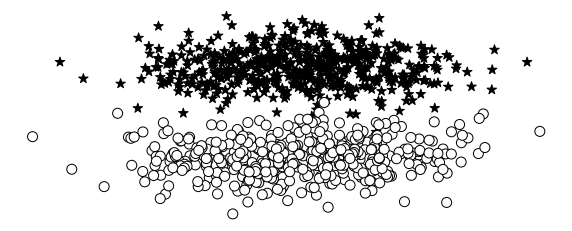

In [14]:
import numpy as np
import matplotlib.pyplot as plt

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors =  []

for x_i, y_true_i in zip(x_data, y_truth):
    color = 'black'

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

left_x = np.stack(left_x)
right_x = np.stack(right_x)

_, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker='*', s=100)
ax.scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor=right_colors, marker='o', s=100)

plt.axis('off');

In [15]:
import torch.nn as nn
import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

In [ ]:
for epoch_i in range(n_epochs):
  for batch_i in range(n_batches):
    # step 0: 데이터 가져오기
    x_data, y_target = get_toy_data(batch_size)
    # step 1: 그레이디언트 초기화
    perceptron.zero_grad()
    # step 2: 모델의 정방향 계산 수행하기
    y_pred = perceptron(x_data, apply_sigmoid=True)
    # step 3: 최적화하려는 손실 계산하기
    loss = bce_loss(y_pred, y_target)
    # step 4: 손실 신호를 거꾸로 전파하기
    loss.backward()
    # step 5: 옵티마이저로 업데이트하기
    optimizer.step()

## 3.5 부가적인 훈련 개념


### 1. 모델의 성능을 어떻게 올바르게 측정할 것인가
- 평가 지표 설정하기: 가장 널리 사용하는 평가 지표는 **정확도**로 , 훈련하는 동안 만나지 못한 데이터에 대해 올바르게 예측한 비율이다.
- 모델 일반화하기: validation data를 통한... + k-fold validation

### 2. 언제 훈련을 멈출 것인가
가장 널리 사용하는 방법은 **조기 종료(early stopping)**로, 각 에포크마다 검증 데이터셋에 대한 성능을 기록하고 이 성능이 더는 좋아지지 않을 때를 감지해 훈련을 종료하는 방법이다. 훈련을 종료하기 전에 기다리는 에포크 횟수를 **인내(patience)**라고 하며, 일반적으로 모델이 어떤 데이터셋에서 더 이상 개선되지 않는 지점을 모델이 **수렴**된 곳이라고 한다. 수렴까지 걸리는 시간이 길고, 과적합의 가능성이 있으므로 실전에서 모델이 완전히 수렴되도록 기다리는 일은 드물다.

### 3. 어떻게 하이퍼파라미터 값을 설정할 것인가
하이퍼파라미터는 모델의 파라미터 개수와 값에 영향을 미치는 모든 모델 설정이다. 손실 함수나 옵티마이저, 옵티마이저의 학습률, 레이어 개수, 에포크 수 등이 하이퍼파라밑에 해당한다. 각 하이퍼파라미터에 대한 선택이 모델의 수렴과 성능에 크게 영향을 주므로, 여러 선택 옵션을 체계적으로 테스트해야 한다.

### 4. 어떻게 모델을 규제할 것인가
규제(regularization)은 모델이 너무 복잡해지지 않도록 임의로 제약을 가하는 것으로, 딥러닝에서 가장 중요한 개념에 속한다. 학습 데이터의 모든 feature를 반영하기 위해서 모델은 복잡한 식을 갖게 되는데, 모델의 각 항(feature를 의미함)의 계수를 조정해 각 feature의 영향력을 줄이는 방법이다. L1, L2 regularization과 관련된 설명은 아래의 블로그에 잘 정리되어 있다.

https://dailyheumsi.tistory.com/57